<a href="https://colab.research.google.com/github/Kinkyamiee/AI_Engineer_CNN_Skin_Image_Assessment/blob/main/AI_Engineer_CNN_Skin_Image_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Skin_Conditions.zip to Skin_Conditions.zip


In [3]:
import zipfile
import os

zip_path = "/content/Skin_Conditions.zip"
extract_path = "/content/Skin_Conditions"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset unzipped to:", extract_path)

✅ Dataset unzipped to: /content/Skin_Conditions


In [19]:
import tensorflow as tf

# Set dataset path and image properties
dataset_dir = "/content/Skin_Conditions/Skin_Conditions"
img_size = (224, 224)
batch_size = 32
seed = 123

# Load the full dataset
data = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    seed=seed
)

# Calculate number of batches
total_batches = tf.data.experimental.cardinality(data).numpy()
train_size = int(0.7 * total_batches)
val_size = int(0.15 * total_batches)
test_size = total_batches - train_size - val_size

# Split the dataset
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size)

# Confirm splits
print(f"✅ Train batches: {train_size}")
print(f"✅ Validation batches: {val_size}")
print(f"✅ Test batches: {test_size}")

Found 2394 files belonging to 6 classes.
✅ Train batches: 52
✅ Validation batches: 11
✅ Test batches: 12


Class labels: ['Acne', 'Carcinoma', 'Eczema', 'Keratosis', 'Milia', 'Rosacea']


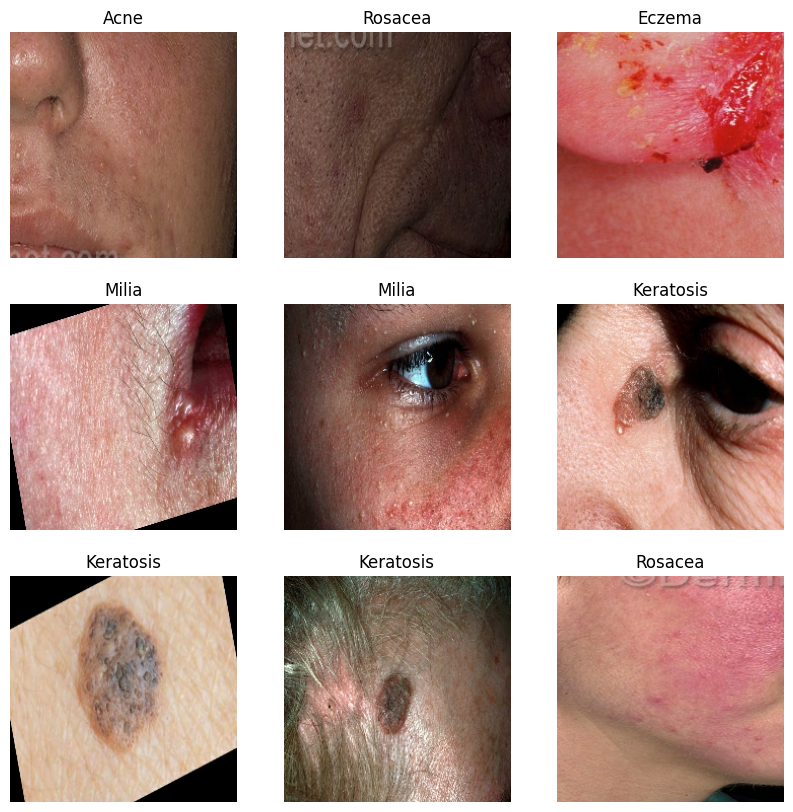

In [20]:
# View class names
class_names = data.class_names
print("Class labels:", class_names)

# Show sample images from train_ds
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),

    # Flatten & Dense Layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # reduce overfitting
    Dense(6, activation='softmax')  # 6 output classes
])



In [33]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,786,054 (98.37 MB)

 Trainable params: 25,785,606 (98.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Model checkpoint callback
model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

# Train the model
history = model.fit(
    train_data,                    # ⬅️ match your variable name
    validation_data=val_data,
    callbacks=[early_stopping, model_checkpoint],
    epochs=10,
    verbose=1
)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3142 - loss: 24.0118
Epoch 1: val_loss improved from inf to 39.91331, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 228ms/step - accuracy: 0.3143 - loss: 23.8491 - val_accuracy: 0.2074 - val_loss: 39.9133
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2669 - loss: 2.6985
Epoch 2: val_loss improved from 39.91331 to 2.04992, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 322ms/step - accuracy: 0.2665 - loss: 2.6900 - val_accuracy: 0.2301 - val_loss: 2.0499
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.2501 - loss: 1.7650
Epoch 3: val_loss improved from 2.04992 to 1.68988, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - accuracy: 0.2499 - loss: 1.7644 - val_accuracy: 0.3722 - val_loss: 1.6899
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.2515 - loss: 1.7323
Epoch 4: val_loss improved from 1.68988 to 1.4982

In [35]:
from tensorflow.keras.models import load_model

#load the saved model
best_model = load_model('best_model.keras')

#Evaluate the model
test_loss, test_accuracy = best_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.4159 - loss: 1.6289
Test Loss: 1.5898
Test Accuracy: 0.3968


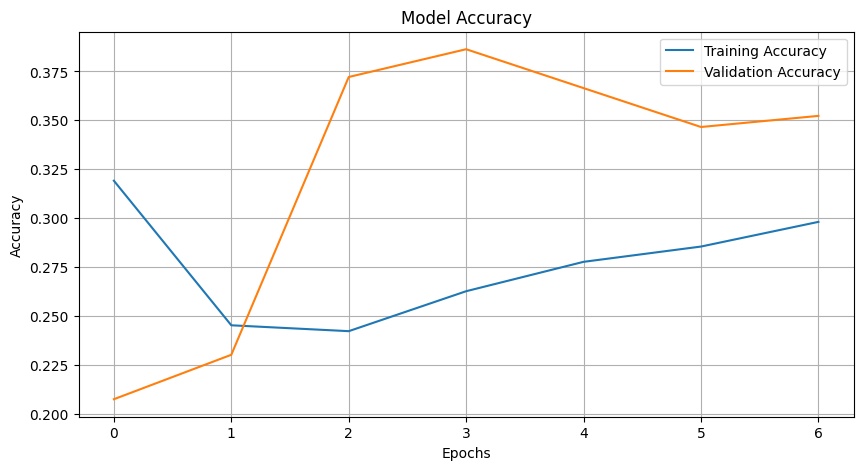

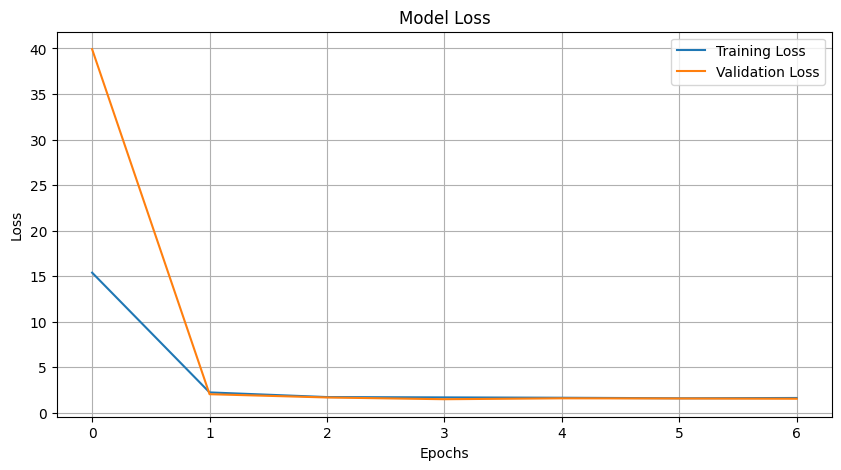

In [36]:
#plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

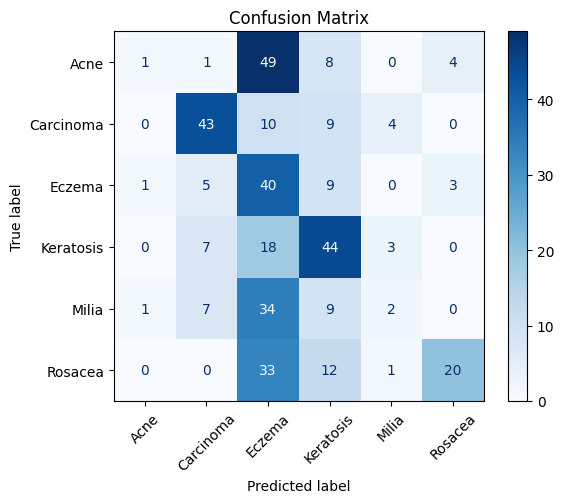

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class names from the training dataset
class_names = data.class_names  # Should match the order of label indices

# Collect all predictions and true labels
y_true = []
y_pred = []

for images, labels in test_data:
    preds = best_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot it
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [38]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models, Input
import tensorflow as tf

# Data augmentation block
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# Load pretrained ResNet50 (without top)
IMG_SHAPE = (224, 224, 3)
base_model = ResNet50(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False  # Keep frozen initially

# Enhanced model
inputs = Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = layers.Lambda(preprocess_input)(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model = models.Model(inputs, outputs)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [39]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,851,270 (90.99 MB)

 Trainable params: 263,302 (1.00 MB)

 Non-trainable params: 23,587,968 (89.98 MB)

In [40]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss',
                           patience=3,
                           restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_resnet_model.keras',
                                   save_best_only=True,
                                   monitor='val_loss')

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop, model_checkpoint]
)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 29s 307ms/step - accuracy: 0.5370 - loss: 1.4186 - val_accuracy: 0.8352 - val_loss: 0.5334
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 248ms/step - accuracy: 0.8020 - loss: 0.5732 - val_accuracy: 0.8693 - val_loss: 0.3881
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - accuracy: 0.8447 - loss: 0.4346 - val_accuracy: 0.8267 - val_loss: 0.4491
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 256ms/step - accuracy: 0.8738 - loss: 0.3727 - val_accuracy: 0.8835 - val_loss: 0.3468
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 252ms/step - accuracy: 0.8984 - loss: 0.3050 - val_accuracy: 0.9148 - val_loss: 0.2872
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 275ms/step - accuracy: 0.9037 - loss: 0.2850 - val_accuracy: 0.8977 - val_loss: 0.2743
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 267ms/step - accuracy: 0.8965 - loss: 0.2802 - val_accuracy: 0.9432 - val_loss: 0.1986
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.9116 - loss: 0.2493 - val_accu

In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the saved model
best_model = load_model('best_resnet_model.keras', custom_objects={'preprocess_input': preprocess_input})

# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - accuracy: 0.8908 - loss: 0.2871
Test Loss: 0.2735
Test Accuracy: 0.8995


In [42]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras import layers, models


In [43]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])


In [44]:
IMG_SHAPE = (224, 224, 3)

base_model = EfficientNetB0(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze base model


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [45]:
model = models.Sequential([
    data_augmentation,
    layers.Lambda(preprocess_input),  # EfficientNet expects specific preprocessing
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')  # For your 6 skin classes
])


In [47]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [49]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_efficientnet.keras", save_best_only=True, monitor="val_loss")

history_efficientnet = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 277ms/step - accuracy: 0.5160 - loss: 1.2835 - val_accuracy: 0.7756 - val_loss: 0.6256
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 301ms/step - accuracy: 0.7642 - loss: 0.6533 - val_accuracy: 0.8153 - val_loss: 0.5115
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.8343 - loss: 0.4783 - val_accuracy: 0.8722 - val_loss: 0.3526
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - accuracy: 0.8498 - loss: 0.4523 - val_accuracy: 0.8864 - val_loss: 0.3272
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 300ms/step - accuracy: 0.8835 - loss: 0.3518 - val_accuracy: 0.9006 - val_loss: 0.2807
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.8929 - loss: 0.3364 - val_accuracy: 0.8835 - val_loss: 0.2776
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 223ms/step - accuracy: 0.8982 - loss: 0.3127 - val_accuracy: 0.9176 - val_loss: 0.2476
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 307ms/step - accuracy: 0.8928 - loss: 0.2897 - val_accu

In [54]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input

# Load EfficientNet model with Lambda layer
efficientnet_model = load_model('best_efficientnet.keras', custom_objects={
    'preprocess_input': preprocess_input
})


test_loss, test_accuracy = efficientnet_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - accuracy: 0.9407 - loss: 0.2305
Test Loss: 0.2318
Test Accuracy: 0.9365


In [59]:
from google.colab import files
files.download("best_model.keras")   # or use "best_model.h5"
files.download("best_resnet_model.keras")
files.download("best_efficientnet.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>